# <center>Visualization of CNN layers</center>

In [1]:
cd /content/drive/MyDrive/Colab Notebooks/AMLTF IA

/content/drive/MyDrive/Colab Notebooks/AMLTF IA


# Imports

In [2]:
from keras.models import load_model, Model
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
import os

In [3]:
filename = 'paper1.png'

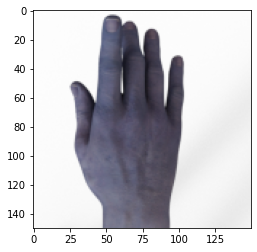

In [4]:
# Displaying the image
img = cv2.imread('rps-pred/' + filename)/255
img = cv2.resize(img, (150, 150))
plt.imshow(img)

In [5]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 150, 150, 3)

## Visualizing the output of custom model

In [6]:
model = load_model('overfit.h5')    # Loading the model

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [8]:
for i, layer in enumerate(model.layers):
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    print(i, layer.name, filters.shape)

0 conv2d_5 (3, 3, 3, 64)
2 conv2d_6 (3, 3, 64, 64)
4 conv2d_7 (3, 3, 64, 128)
6 conv2d_8 (3, 3, 128, 128)
8 conv2d_9 (3, 3, 128, 256)


In [9]:
layer_outputs = [layer.output for layer in model.layers[:10]]
temp_model = Model(inputs=model.input, outputs=layer_outputs)
activations = temp_model.predict(img)

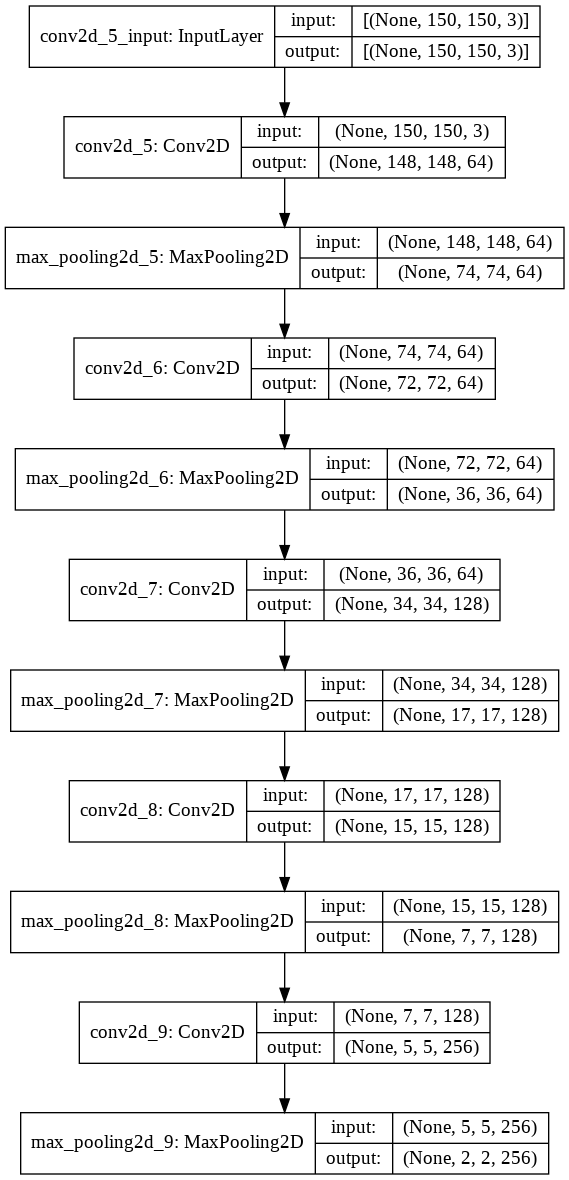

In [10]:
plot_model(temp_model, show_shapes=True)

In [11]:
layer_activation = activations[4]

In [12]:
layer_activation.shape

(1, 34, 34, 128)

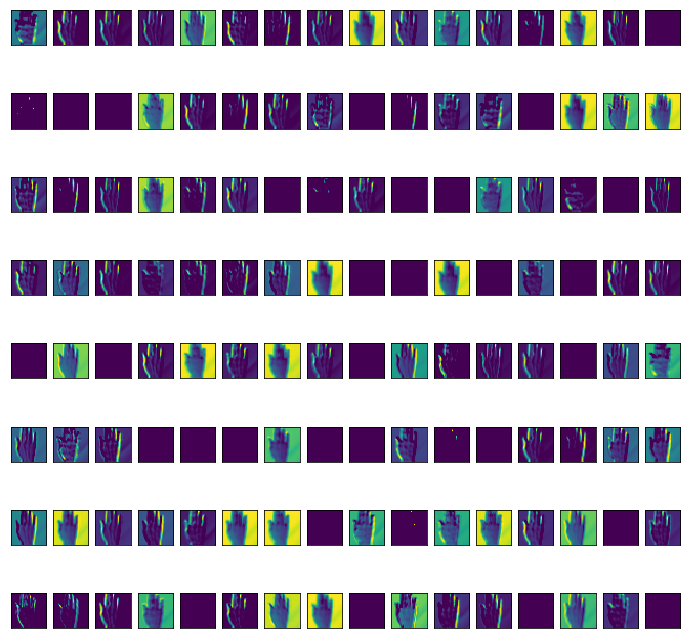

In [13]:
plt.figure(figsize=(12, 12))
for i in range(128):
    ax = plt.subplot(8, 16, i+1)
    ax.matshow(layer_activation[0, :, :, i], cmap='viridis')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

## Visualizing the output of VGG16 Model

In [14]:
model = load_model('vgg.h5')
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_12 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 8192)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 1024)              8389632   
_________________________________________________________________
dropout_18 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 3)                 3075      
Total params: 23,107,395
Trainable params: 8,392,707
Non-trainable params: 14,714,688
_________________________________

In [15]:
vgg = model.layers[0]
vgg

In [16]:
for i, l in enumerate(vgg.layers):
    print(i, l.name)

0 input_11
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [17]:
layer_outputs = [layer.output for layer in vgg.layers[:18]]
temp_model = Model(inputs=vgg.input, outputs=layer_outputs)
activations = temp_model.predict(img)

In [24]:
layer_activation = activations[10]

In [25]:
layer_activation.shape

(1, 18, 18, 256)

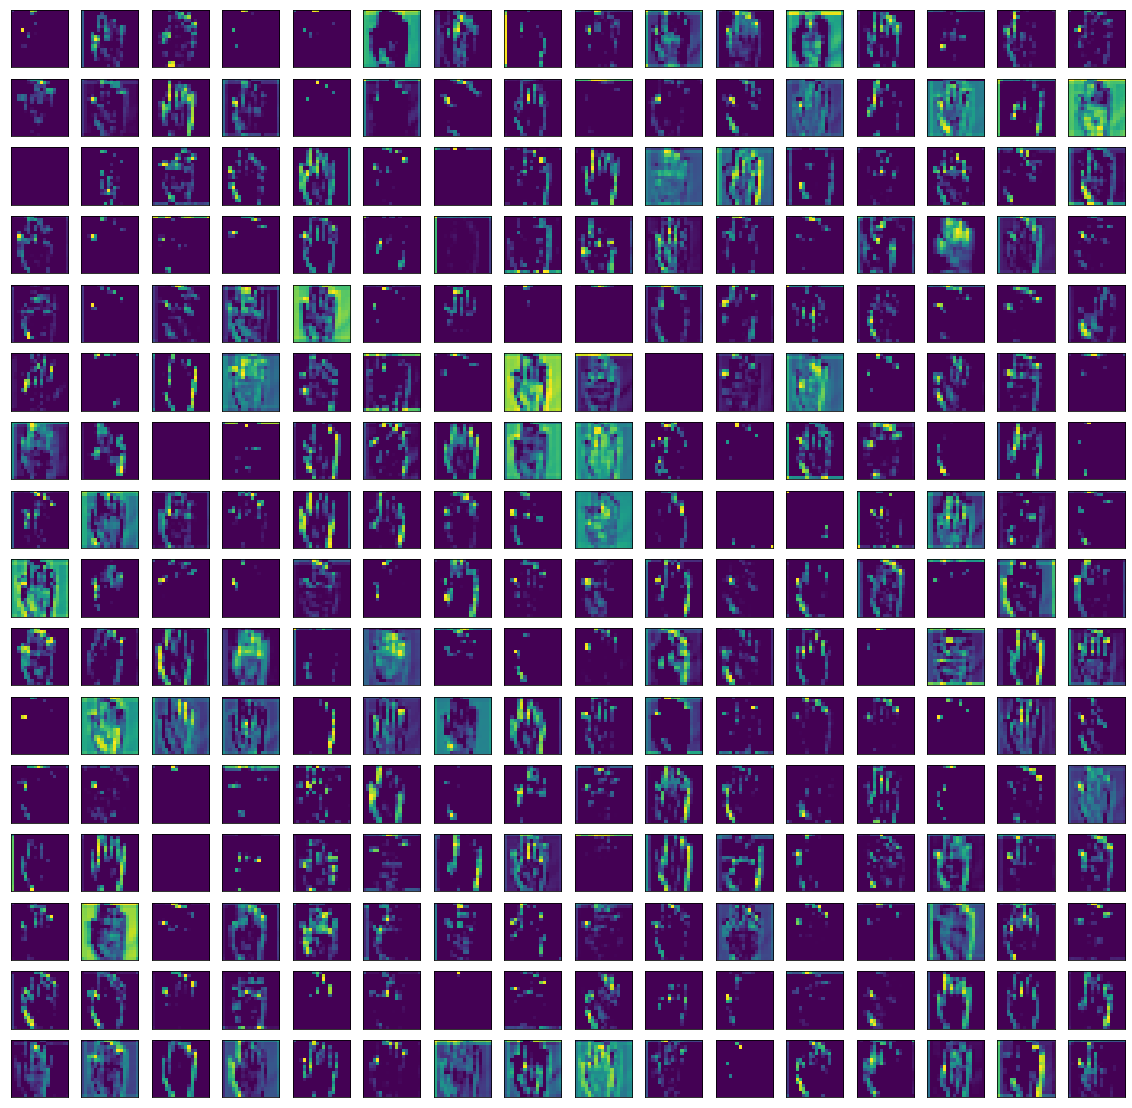

In [26]:
plt.figure(figsize=(20, 20))
for i in range(256):
    ax = plt.subplot(16, 16, i+1)
    ax.matshow(layer_activation[0, :, :, i], cmap='viridis')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()